# 1. 데이터 전처리 (Data Preprocessing)

## 1-1. 데이터 로드 (Data load)

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import sklearn
%matplotlib inline

for chunk in pd.read_csv("C:/Users/dgpar/Desktop/project/LendingClub_Loan_Data/loan.csv/loan.csv",chunksize=1):
    df2 = pd.DataFrame(chunk)
    break
df2.columns

df1 = pd.read_csv("C:/Users/dgpar/Desktop/project/LendingClub_Loan_Data/loan.csv/loan.csv",
                  names=df2.columns, skiprows = lambda i: random.random() > 0.25)

#Columns 전체 표시
print(df1.shape)
pd.set_option('display.max_columns',100)
df1.head(3)

c:\users\dgpar\appdata\local\programs\python\python37-32\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (19,55) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(221434, 74)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1075269,1311441,5000.0,5000.0,5000.0,36 months,7.90,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0.0,Nov-2004,3.0,NaN,NaN,9.0,0.0,7963.0,28.3,12.0,f,0.00,0.00,5631.377753,5631.38,5000.00,631.38,0.0,0.0,0.0,Jan-2015,161.03,NaN,Sep-2015,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1069639,1304742,7000.0,7000.0,7000.0,60 months,15.96,170.08,C,C5,Southern Star Photography,8 years,RENT,47004.0,Not Verified,Dec-2011,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/18/11 > I am planning o...,debt_consolidation,Loan,280xx,NC,23.51,0.0,Jul-2005,1.0,NaN,NaN,7.0,0.0,17726.0,85.6,11.0,f,1889.15,1889.15,8136.840000,8136.84,5110.85,3025.99,0.0,0.0,0.0,Jan-2016,170.08,Feb-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1070078,1305201,6500.0,6500.0,6500.0,60 months,14.65,153.45,C,C3,Southwest Rural metro,5 years,OWN,72000.0,Not Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/15/11 > I had recived a...,debt_consolidation,High intrest Consolidation,853xx,AZ,16.12,0.0,Jan-1998,2.0,NaN,NaN,14.0,0.0,4032.0,20.6,23.0,f,0.00,0.00,7677.520000,7677.52,6500.00,1177.52,0.0,0.0,0.0,Jun-2013,1655.54,NaN,Dec-2015,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 1-2. Column 통합 및 삭제 (Integrate & drop columns)

### loan_status 확인. y값 설정

In [18]:
print(df1['loan_status'].value_counts())

Current                                                150395
Fully Paid                                              51724
Charged Off                                             11298
Late (31-120 days)                                       2836
Issued                                                   2064
In Grace Period                                          1556
Late (16-30 days)                                         580
Does not meet the credit policy. Status:Fully Paid        475
Default                                                   317
Does not meet the credit policy. Status:Charged Off       189
Name: loan_status, dtype: int64


Label
* Default
charged off: 체납 , 추심으로 넘어가는데 동의 (일반적으로 180일 연체) 
late(31-120 days) : 1~ 4달의 연체 
late(16-30 days) : 1달이내 연체 
default : 연체 
Does not meet the credit policy. Status:Charged Off : 대출조건 맞지 않지만 회수 안됨

* Paid
fully paid 
Does not meet the credit policy. Status:Fully Paid : 대출조건 맞지 않아 전액 상환

* Deduct from dataframe
Current : 현재 상환진행 
Issued : 대출결정 
In Grace Period : 상환 유예기간 (거치중인 기간인 듯)

### Columns 정리 : Label 통합, 분석에 사용하지 않는 columns 삭제

In [19]:
#Default, Fully paid로 loan_status label 통합.
df1 = df1[(df1.loan_status != 'Current') & (df1.loan_status !='Does not meet the credit policy. Status:Charged Off') 
          & (df1.loan_status != 'Does not meet the credit policy. Status:Fully Paid') & (df1.loan_status != 'In Grace Period') 
          & (df1.loan_status != 'Issued') & (df1.loan_status != 'Late (16-30 days)')]

print(df1['loan_status'].value_counts())

# Fully paid와 Default로 label 분리. Charged Off와 한달 이상 연체까지 Default로 간주. (True : Fully paid , False : Default)
df1['label'] = (df1['loan_status'] == 'Fully Paid')
print(df1['label'].value_counts())

Fully Paid            51724
Charged Off           11298
Late (31-120 days)     2836
Default                 317
Name: loan_status, dtype: int64
True     51724
False    14451
Name: label, dtype: int64


In [20]:
#id와 Member_id Column 삭제
df1 = df1.drop(['id', 'member_id'],axis=1)
df1.head(3)

#String 타입(object)의 Column 삭제
new_df = df1.iloc[:,:-1]

new_df = df1.iloc[:,:-1]
for i in range(0,len(df1.iloc[1,:])):
    if(type(df1.iloc[1,i]) == str):
        new_df = new_df.drop([df1.iloc[:,i].name], axis=1)

In [21]:
new_df.head(5)

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,next_pymnt_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,5000.0,5000.0,5000.000000,7.90,156.46,36000.0,11.20,0.0,3.0,NaN,NaN,9.0,0.0,7963.0,28.30,12.0,0.0,0.0,5631.377753,5631.38,5000.0,631.38,0.0,0.0,0.0,161.03,NaN,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6500.0,6500.0,6500.000000,14.65,153.45,72000.0,16.12,0.0,2.0,NaN,NaN,14.0,0.0,4032.0,20.60,23.0,0.0,0.0,7677.520000,7677.52,6500.0,1177.52,0.0,0.0,0.0,1655.54,NaN,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6000.0,6000.0,6000.000000,11.71,198.46,84000.0,18.44,2.0,0.0,8.0,NaN,4.0,0.0,0.0,37.73,14.0,0.0,0.0,7164.499852,7164.50,6000.0,1149.50,15.0,0.0,0.0,16.98,NaN,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20250.0,20250.0,19142.161077,15.27,484.63,43370.0,26.53,0.0,3.0,NaN,NaN,8.0,0.0,17813.0,85.60,22.0,0.0,0.0,27663.042671,25417.68,20250.0,7413.04,0.0,0.0,0.0,6024.09,NaN,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,15000.0,15000.0,8725.000000,14.27,514.64,60000.0,15.22,0.0,1.0,NaN,NaN,7.0,0.0,5872.0,57.60,11.0,0.0,0.0,0.000000,0.00,0.0,0.00,0.0,0.0,0.0,0.00,NaN,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 1-3 NaN값이 있는 column의 처리

### 일부 데이터 column 삭제 (NaN값이 많은 항목)

In [22]:
new_df.isnull().sum()

loan_amnt                          0
funded_amnt                        0
funded_amnt_inv                    0
int_rate                           0
installment                        0
annual_inc                         0
dti                                0
delinq_2yrs                        0
inq_last_6mths                     0
mths_since_last_delinq         36570
mths_since_last_record         57837
open_acc                           0
pub_rec                            0
revol_bal                          0
revol_util                        40
total_acc                          0
out_prncp                          0
out_prncp_inv                      0
total_pymnt                        0
total_pymnt_inv                    0
total_rec_prncp                    0
total_rec_int                      0
total_rec_late_fee                 0
recoveries                         0
collection_recovery_fee            0
last_pymnt_amnt                    0
next_pymnt_d                   63022
c

In [23]:
## NaN값이 80%이상인 항목들은 제거.
del_list = new_df.columns[new_df.isnull().sum()/new_df.shape[0] > 0.8]
new_df = new_df.drop(del_list, axis=1)

In [24]:
new_df.isnull().sum()

loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
int_rate                          0
installment                       0
annual_inc                        0
dti                               0
delinq_2yrs                       0
inq_last_6mths                    0
mths_since_last_delinq        36570
open_acc                          0
pub_rec                           0
revol_bal                         0
revol_util                       40
total_acc                         0
out_prncp                         0
out_prncp_inv                     0
total_pymnt                       0
total_pymnt_inv                   0
total_rec_prncp                   0
total_rec_int                     0
total_rec_late_fee                0
recoveries                        0
collection_recovery_fee           0
last_pymnt_amnt                   0
collections_12_mths_ex_med       22
policy_code                       0
acc_now_delinq              

In [25]:
print(new_df.shape)

(66175, 31)


### 남은 NaN값 탐색 후, 각 Column의 대표값으로 대체

#### 1) mths_since_last_delinq (채무자의 마지막 채무불이행 이후 경과 시간)

In [26]:
new_df['mths_since_last_delinq'].head(5)

0    NaN
2    NaN
3    8.0
4    NaN
5    NaN
Name: mths_since_last_delinq, dtype: float64

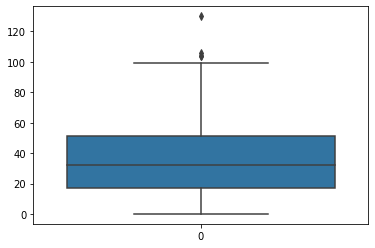

In [30]:
sns.boxplot(data = new_df['mths_since_last_delinq'])
plt.show()

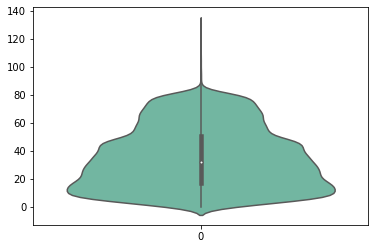

In [32]:
sns.violinplot(data = new_df['mths_since_last_delinq'], palette = "Set2")
plt.show()

In [35]:
print("mean:", new_df['mths_since_last_delinq'].mean())
print("median:", new_df['mths_since_last_delinq'].median())

mean: 34.9992568822834
median: 32.0


In [36]:
## 상방으로 아웃라이어 값들이 몰려있어 평균을 사용할 경우 데이터가 한쪽으로 편중될 수 있음.
## 따라서, 중앙값을 사용.
new_df['mths_since_last_delinq'].replace(np.NaN, new_df['mths_since_last_delinq'].median(), inplace=True)

In [37]:
new_df['mths_since_last_delinq'].iloc[:].tail(5)

221387    16.0
221408    32.0
221409    32.0
221417    11.0
221432    32.0
Name: mths_since_last_delinq, dtype: float64

#### 2) revol_util

In [38]:
new_df['revol_util'].iloc[:].head(5)

0    28.30
2    20.60
3    37.73
4    85.60
5    57.60
Name: revol_util, dtype: float64

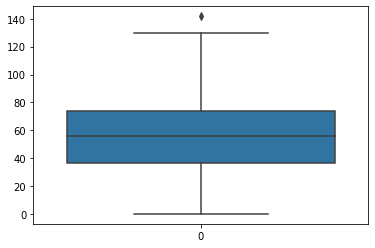

In [39]:
sns.boxplot(data = new_df['revol_util'])
plt.show()

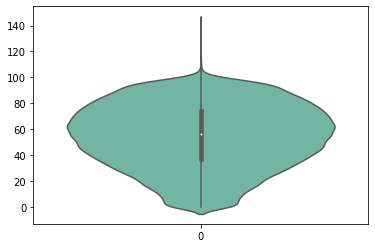

In [40]:
sns.violinplot(data = new_df['revol_util'], palette = "Set2")
plt.show()

In [52]:
print("mean:", new_df['revol_util'].mean())
print("median:", new_df['revol_util'].median())

mean: 54.60792323384965
median: 56.1


In [42]:
#대표값으로 중앙값 선정.
new_df['revol_util'].fillna((new_df['revol_util'].median()), inplace=True)

#### 3) collections_12_mths_ex_med (12개월내의 채권 추심 여부)

In [44]:
new_df['collections_12_mths_ex_med'].head(5)

0    0.0
2    0.0
3    0.0
4    0.0
5    0.0
Name: collections_12_mths_ex_med, dtype: float64

<AxesSubplot:>

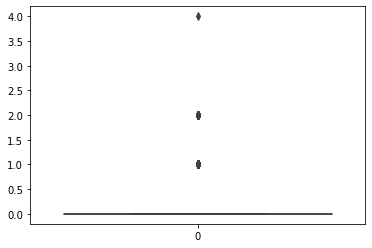

In [45]:
sns.boxplot(data = new_df['collections_12_mths_ex_med'])

In [46]:
new_df['collections_12_mths_ex_med'].value_counts()

0.0    65709
1.0      420
2.0       23
4.0        1
Name: collections_12_mths_ex_med, dtype: int64

In [47]:
new_df['collections_12_mths_ex_med'].describe()

count    66153.000000
mean         0.007105
std          0.089057
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          4.000000
Name: collections_12_mths_ex_med, dtype: float64

In [51]:
print("mean:", new_df['collections_12_mths_ex_med'].mean())
print("median:", new_df['collections_12_mths_ex_med'].median())

mean: 0.007104742037398153
median: 0.0


In [53]:
#대표값으로 중앙값 선정
new_df['collections_12_mths_ex_med'].fillna((new_df['collections_12_mths_ex_med'].median()), inplace=True)

#### 4) tot_coll_amt (현재까지 대출받은 총 징수액)

In [55]:
new_df['tot_coll_amt'].iloc[:].tail()

221387    0.0
221408    0.0
221409    0.0
221417    0.0
221432    0.0
Name: tot_coll_amt, dtype: float64

<AxesSubplot:>

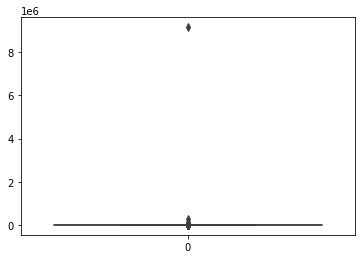

In [56]:
sns.boxplot(data = new_df['tot_coll_amt'])

In [57]:
print(new_df['tot_coll_amt'].describe())

count    5.026000e+04
mean     3.427809e+02
std      4.087459e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      9.152545e+06
Name: tot_coll_amt, dtype: float64


In [60]:
print("mean:", new_df['tot_coll_amt'].mean())
print("median:", new_df['tot_coll_amt'].median())

mean: 342.7809391165937
median: 0.0


In [62]:
# 아웃라이어의 영향이 매우 크기 때문에 중앙값으로 NaN 대체. 추후 성능이 안좋을시 평균값과 중앙값의 성능차이 확인
new_df['tot_coll_amt'].fillna((new_df['tot_coll_amt'].median()), inplace=True)

#### 5) tot_cur_bal (현재 총 잔고)

In [63]:
new_df['tot_cur_bal'].iloc[:].tail(5)

221387     58658.0
221408    167189.0
221409     19098.0
221417     51882.0
221432     18979.0
Name: tot_cur_bal, dtype: float64

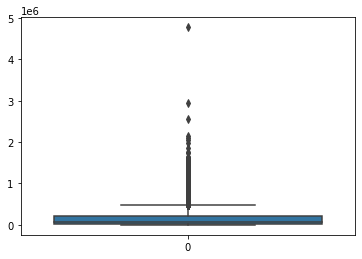

count    5.026000e+04
mean     1.374012e+05
std      1.511816e+05
min      0.000000e+00
25%      2.841700e+04
50%      7.990900e+04
75%      2.073895e+05
max      4.772549e+06
Name: tot_cur_bal, dtype: float64


In [64]:
sns.boxplot(data = new_df['tot_cur_bal'])
plt.show()
print(new_df['tot_cur_bal'].describe())

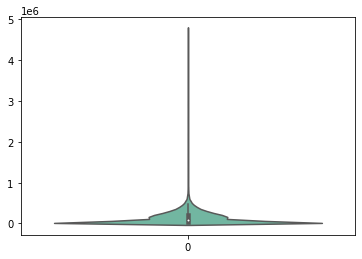

In [66]:
sns.violinplot(data = new_df['tot_cur_bal'], palette = "Set2")
plt.show()

In [67]:
new_df['tot_cur_bal'].describe()

count    5.026000e+04
mean     1.374012e+05
std      1.511816e+05
min      0.000000e+00
25%      2.841700e+04
50%      7.990900e+04
75%      2.073895e+05
max      4.772549e+06
Name: tot_cur_bal, dtype: float64

In [69]:
print("mean:", new_df['tot_cur_bal'].mean())
print("median:", new_df['tot_cur_bal'].median())

mean: 137401.15009948268
median: 79909.0


In [70]:
# 상방으로 아웃라이어 값들이 많으므로 중앙값으로 NaN 대체.
new_df['tot_cur_bal'].fillna((new_df['tot_cur_bal'].median()), inplace=True)

#### 5) total_rev_hi_lim (총 리볼빙 상한 / 신용한도)

In [72]:
new_df['total_rev_hi_lim'].iloc[:].tail(5)

221387     5300.0
221408    35500.0
221409    10300.0
221417     3800.0
221432    30100.0
Name: total_rev_hi_lim, dtype: float64

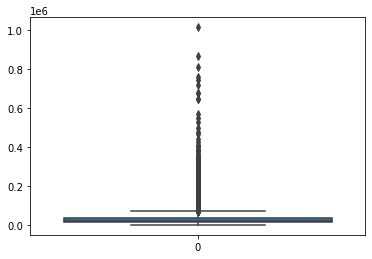

count    5.026000e+04
mean     2.970295e+04
std      2.975935e+04
min      0.000000e+00
25%      1.320000e+04
50%      2.220000e+04
75%      3.690000e+04
max      1.013700e+06
Name: total_rev_hi_lim, dtype: float64


In [73]:
sns.boxplot(data = new_df['total_rev_hi_lim'])
plt.show()
print(new_df['total_rev_hi_lim'].describe())

In [74]:
print("mean:", new_df['tot_coll_amt'].mean())
print("median:", new_df['tot_coll_amt'].median())

mean: 260.3425765017
median: 0.0


In [75]:
# 상방으로 아웃라이어 값들이 많으므로 중앙값으로 NaN 대체.
new_df['total_rev_hi_lim'].fillna((new_df['total_rev_hi_lim'].median()), inplace=True)

In [76]:
new_df.isnull().sum()

loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
int_rate                      0
installment                   0
annual_inc                    0
dti                           0
delinq_2yrs                   0
inq_last_6mths                0
mths_since_last_delinq        0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
out_prncp                     0
out_prncp_inv                 0
total_pymnt                   0
total_pymnt_inv               0
total_rec_prncp               0
total_rec_int                 0
total_rec_late_fee            0
recoveries                    0
collection_recovery_fee       0
last_pymnt_amnt               0
collections_12_mths_ex_med    0
policy_code                   0
acc_now_delinq                0
tot_coll_amt                  0
tot_cur_bal                   0
total_rev_hi_lim              0
dtype: i

## 1-4. 변수간 다중 공선성 확인

In [77]:
new_df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'mths_since_last_delinq', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med', 'policy_code',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim'],
      dtype='object')

In [82]:
cor = new_df.columns

In [80]:
cor = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'mths_since_last_delinq', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med', 'policy_code',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim']

In [61]:
print(len(cor))

31


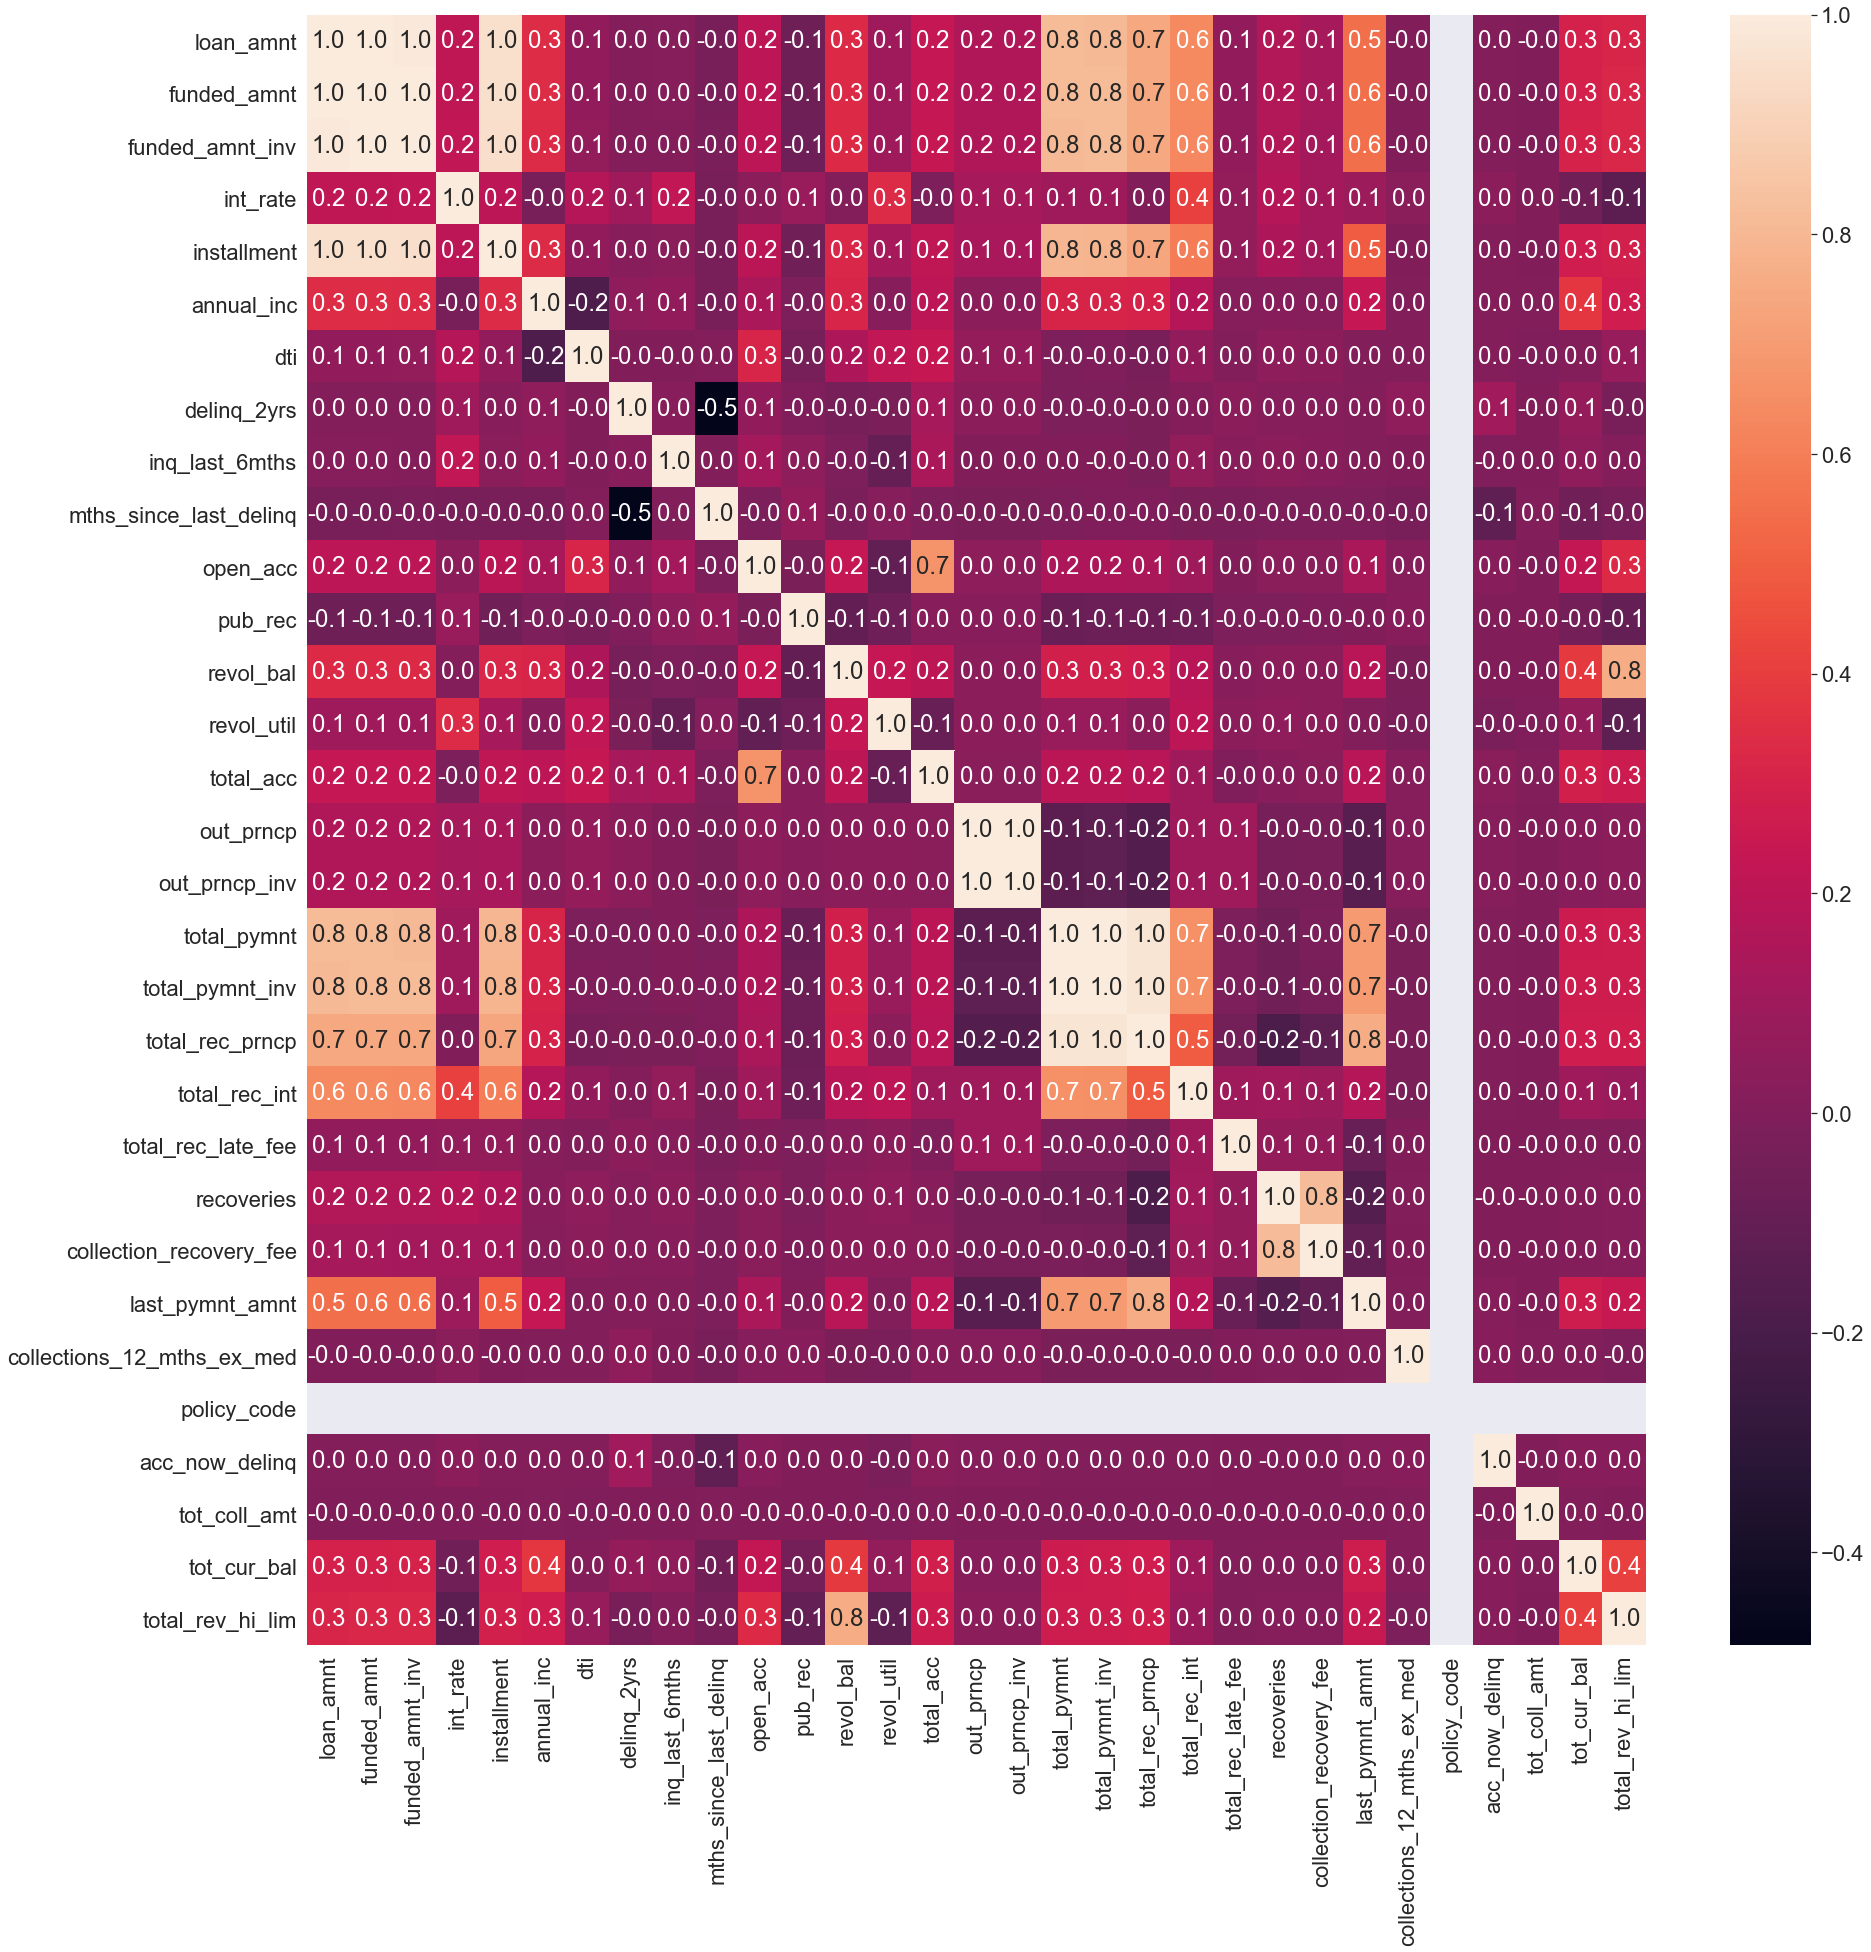

In [86]:
corrmat = new_df[cor].corr()

f, ax = plt.subplots(figsize=(30,30))
sns.set(font_scale=2)
hm = sns.heatmap(corrmat, cbar=True, annot=True, fmt='.1f')

plt.show()

In [87]:
#다중공선성이 높은 항목 제거
df1 = df1.drop(['loan_amnt', 'funded_amnt_inv', 'installment', 'out_prncp_inv', 
                'total_pymnt_inv', 'total_rec_prncp'],axis=1)

# 2. 모델 학습 및 평가 (변수선택법)

## 2-1. Train 및 Test Data set 분리

In [89]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

X,y = new_df.iloc[:,:-1].values, df1.iloc[:,-1].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)

## 2-2. Scalining

In [90]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)

## 2-3. RecursiveFeatureElimination with Logistic regression

In [112]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

lr = LogisticRegression(max_iter=1000)
max_num = 0
max_score = 0

# RFE에서 몇개의 변수를 선택했을 때 가장 성능이 좋은지 확인
for i in range(3,8) :
    rfe = RFE(lr, i)
    rfe_train = rfe.fit(X_train_std, y_train)
    X_train_rfe = rfe.transform(X_train_std)

    # summarize the selection of the attributes
    print("선택한 변수 갯수 :",i)
    print(rfe.support_)
    print(rfe.ranking_)

    rfe_test = rfe.fit(X_test_std, y_test)
    X_test_rfe = rfe.transform(X_test_std)

    lr.fit(X_train_rfe, y_train)
    lr_y_pred = lr.predict(X_test_rfe)
    print(classification_report(y_test, lr_y_pred, target_names = ['Fraud', 'NotFraud']))
    #lr.score(X_test_rfe , y_test)
    
    if(f1_score(y_test, lr_y_pred) > max_score):
        max_score = f1_score(y_test, lr_y_pred)
        max_num = i
    print("______________________________________")
    
print("best number of features : ",max_num)
print("best f1-score : ",max_score)

c:\users\dgpar\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass n_features_to_select=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


선택한 변수 갯수 : 3
[False  True False False False False False False False False False False
 False False False False False False False  True False False False False
  True False False False False False]
[11  1  7 14  6 13 18 23 27 24 25 22 17 21 16  3  5  9  8  1 10 12  2  4
  1 26 28 19 15 20]
              precision    recall  f1-score   support

       Fraud       1.00      0.97      0.99      4276
    NotFraud       0.99      1.00      1.00     15577

    accuracy                           0.99     19853
   macro avg       1.00      0.99      0.99     19853
weighted avg       0.99      0.99      0.99     19853

______________________________________


c:\users\dgpar\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass n_features_to_select=4 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


선택한 변수 갯수 : 4
[False  True False False False False False False False False False False
 False False False False False False False  True False False  True False
  True False False False False False]
[10  1  6 13  5 12 17 22 26 23 24 21 16 20 15  2  4  8  7  1  9 11  1  3
  1 25 27 18 14 19]
              precision    recall  f1-score   support

       Fraud       1.00      0.98      0.99      4276
    NotFraud       0.99      1.00      1.00     15577

    accuracy                           1.00     19853
   macro avg       1.00      0.99      0.99     19853
weighted avg       1.00      1.00      1.00     19853

______________________________________


c:\users\dgpar\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass n_features_to_select=5 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


선택한 변수 갯수 : 5
[False  True False False False False False False False False False False
 False False False  True False False False  True False False  True False
  True False False False False False]
[ 9  1  5 12  4 11 16 21 25 22 23 20 15 19 14  1  3  7  6  1  8 10  1  2
  1 24 26 17 13 18]
              precision    recall  f1-score   support

       Fraud       1.00      0.98      0.99      4276
    NotFraud       0.99      1.00      1.00     15577

    accuracy                           1.00     19853
   macro avg       1.00      0.99      0.99     19853
weighted avg       1.00      1.00      1.00     19853

______________________________________


c:\users\dgpar\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass n_features_to_select=6 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


선택한 변수 갯수 : 6
[False  True False False False False False False False False False False
 False False False  True False False False  True False False  True  True
  True False False False False False]
[ 8  1  4 11  3 10 15 20 24 21 22 19 14 18 13  1  2  6  5  1  7  9  1  1
  1 23 25 16 12 17]
              precision    recall  f1-score   support

       Fraud       0.24      0.36      0.29      4276
    NotFraud       0.80      0.69      0.74     15577

    accuracy                           0.62     19853
   macro avg       0.52      0.53      0.52     19853
weighted avg       0.68      0.62      0.64     19853

______________________________________


c:\users\dgpar\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass n_features_to_select=7 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


선택한 변수 갯수 : 7
[False  True False False False False False False False False False False
 False False False  True  True False False  True False False  True  True
  True False False False False False]
[ 7  1  3 10  2  9 14 19 23 20 21 18 13 17 12  1  1  5  4  1  6  8  1  1
  1 22 24 15 11 16]
              precision    recall  f1-score   support

       Fraud       0.23      0.37      0.28      4276
    NotFraud       0.79      0.66      0.72     15577

    accuracy                           0.60     19853
   macro avg       0.51      0.52      0.50     19853
weighted avg       0.67      0.60      0.63     19853

______________________________________
best number of features :  5
best f1-score :  0.9973748239211166


In [113]:
print("최적의 변수 갯수 : ",max_num)
print("최적의 점수 : ",max_score)

최적의 변수 갯수 :  5
최적의 점수 :  0.9973748239211166


In [114]:
new_df.columns[:]

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'mths_since_last_delinq', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med', 'policy_code',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim'],
      dtype='object')

In [117]:
print(new_df.columns[2])
print(new_df.columns[16])
print(new_df.columns[20])
print(new_df.columns[23])
print(new_df.columns[25])

funded_amnt_inv
out_prncp_inv
total_rec_int
collection_recovery_fee
collections_12_mths_ex_med


## 2-4. RFE with Decision Tree

In [157]:
from sklearn.tree import DecisionTreeClassifier

#Decision Tree
dt = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)

dt_max_num = 0
dt_max_score = 0

# RFE에서 몇개의 변수를 선택했을 때 가장 성능이 좋은지 확인. print 생략.
for i in range(3,8) :
    rfe = RFE(dt, i)
    dt_rfe_train = rfe.fit(X_train_std, y_train)
    X_train_rfe = rfe.transform(X_train_std)

    # summarize the selection of the attributes
    #rint("선택한 변수 갯수 :",i)
    print(rfe.support_)
    print(rfe.ranking_)

    rfe_test = rfe.fit(X_test_std, y_test)
    X_test_rfe = rfe.transform(X_test_std)

    dt.fit(X_train_rfe, y_train)
    dt_y_pred = dt.predict(X_test_rfe)
    print(classification_report(y_test, dt_y_pred, target_names = ['Fraud', 'NotFraud']))
    dt.score(X_test_rfe , y_test)
    
    if(f1_score(y_test, dt_y_pred) > dt_max_score):
        dt_max_score = f1_score(y_test, dt_y_pred)
        dt_max_num = i
    #print("______________________________________")
    
print("best number of features : ",dt_max_num)
print("best f1-score : ",dt_max_score)

c:\users\dgpar\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass n_features_to_select=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[False False False False False False False False False False False False
 False False False False  True False False False False False  True False
  True False False False False False]
[27  2 13 15  4 14 12 11  6 16 18 20 22 24 28 21  1 10  9  3  8  5  1  7
  1 17 19 23 25 26]
              precision    recall  f1-score   support

       Fraud       0.18      0.53      0.27      4276
    NotFraud       0.73      0.36      0.48     15577

    accuracy                           0.39     19853
   macro avg       0.46      0.44      0.38     19853
weighted avg       0.61      0.39      0.43     19853



c:\users\dgpar\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass n_features_to_select=4 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[False  True False False False False False False False False False False
 False False False False  True False False False False False  True False
  True False False False False False]
[26  1 12 14  3 13 11 10  5 15 17 19 21 23 27 20  1  9  8  2  7  4  1  6
  1 16 18 22 24 25]


c:\users\dgpar\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\dgpar\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass n_features_to_select=5 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


              precision    recall  f1-score   support

       Fraud       0.22      1.00      0.35      4276
    NotFraud       0.00      0.00      0.00     15577

    accuracy                           0.22     19853
   macro avg       0.11      0.50      0.18     19853
weighted avg       0.05      0.22      0.08     19853

[False  True False False False False False False False False False False
 False False False False  True False False  True False False  True False
  True False False False False False]
[25  1 11 13  2 12 10  9  4 14 16 18 20 22 26 19  1  8  7  1  6  3  1  5
  1 15 17 21 23 24]


c:\users\dgpar\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\dgpar\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass n_features_to_select=6 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


              precision    recall  f1-score   support

       Fraud       0.22      1.00      0.35      4276
    NotFraud       0.00      0.00      0.00     15577

    accuracy                           0.22     19853
   macro avg       0.11      0.50      0.18     19853
weighted avg       0.05      0.22      0.08     19853

[False  True False False  True False False False False False False False
 False False False False  True False False  True False False  True False
  True False False False False False]
[24  1 10 12  1 11  9  8  3 13 15 17 19 21 25 18  1  7  6  1  5  2  1  4
  1 14 16 20 22 23]


c:\users\dgpar\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\dgpar\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass n_features_to_select=7 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


              precision    recall  f1-score   support

       Fraud       0.22      1.00      0.35      4276
    NotFraud       0.00      0.00      0.00     15577

    accuracy                           0.22     19853
   macro avg       0.11      0.50      0.18     19853
weighted avg       0.05      0.22      0.08     19853

[False  True False False  True False False False False False False False
 False False False False  True False False  True False  True  True False
  True False False False False False]
[23  1  9 11  1 10  8  7  2 12 14 16 18 20 24 17  1  6  5  1  4  1  1  3
  1 13 15 19 21 22]
              precision    recall  f1-score   support

       Fraud       0.22      1.00      0.35      4276
    NotFraud       0.00      0.00      0.00     15577

    accuracy                           0.22     19853
   macro avg       0.11      0.50      0.18     19853
weighted avg       0.05      0.22      0.08     19853

best number of features :  3
best f1-score :  0.4796165140784246


c:\users\dgpar\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 2-5. RFE with Random Forest

In [158]:
from sklearn.ensemble import RandomForestClassifier

#Random Forest
fr = RandomForestClassifier(criterion = 'entropy', n_estimators=10, random_state = 1, n_jobs=2)

fr_max_num = 0
fr_max_score = 0

# RFE에서 몇개의 변수를 선택했을 때 가장 성능이 좋은지 확인. print 생략.
for i in range(3,8) :
    rfe = RFE(fr, i)
    fr_rfe_train = rfe.fit(X_train_std, y_train)
    X_train_rfe = rfe.transform(X_train_std)

    # summarize the selection of the attributes
    print("선택한 변수 갯수 :",i)
    #print(rfe.support_)
    #print(rfe.ranking_)

    rfe_test = rfe.fit(X_test_std, y_test)
    X_test_rfe = rfe.transform(X_test_std)

    fr.fit(X_train_rfe, y_train)
    fr_y_pred = fr.predict(X_test_rfe)
    #print(classification_report(y_test, fr_y_pred, target_names = ['Fraud', 'NotFraud']))
    #fr.score(X_test_rfe , y_test)
    
    if(f1_score(y_test, fr_y_pred) > fr_max_score):
        fr_max_score = f1_score(y_test, fr_y_pred)
        fr_max_num = i
    #print("______________________________________")
    
print("best number of features : ",fr_max_num)
print("best f1-score : ",fr_max_score)

c:\users\dgpar\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass n_features_to_select=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


선택한 변수 갯수 : 3


c:\users\dgpar\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass n_features_to_select=4 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


선택한 변수 갯수 : 4


c:\users\dgpar\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass n_features_to_select=5 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


선택한 변수 갯수 : 5


c:\users\dgpar\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass n_features_to_select=6 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


선택한 변수 갯수 : 6


c:\users\dgpar\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass n_features_to_select=7 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


선택한 변수 갯수 : 7
best number of features :  3
best f1-score :  0.997818275154004


# 3. PCA

In [118]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

# n_components 전체를 살펴보면서 각 변수별 영향력 파악.
pca = PCA(n_components=None)
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([2.64303644e-01, 8.69694808e-02, 6.86791976e-02, 6.70022592e-02,
       5.29603376e-02, 5.06624457e-02, 4.56038440e-02, 3.97920284e-02,
       3.54849670e-02, 3.44915711e-02, 3.37098510e-02, 3.27208794e-02,
       3.19371697e-02, 2.47021244e-02, 2.19877679e-02, 1.92902779e-02,
       1.79466238e-02, 1.70765555e-02, 1.65677372e-02, 1.52720970e-02,
       1.03663636e-02, 5.65336973e-03, 4.60914334e-03, 1.68307000e-03,
       4.28397752e-04, 8.26014353e-05, 1.61634492e-05, 3.12915469e-08,
       5.69032170e-16, 2.06898005e-33])

### PCA 성분수의 결정

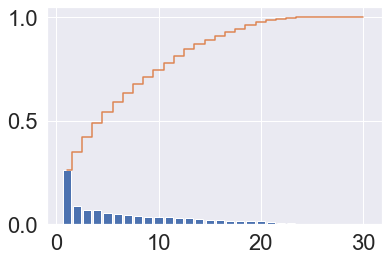

In [120]:
from sklearn.decomposition import PCA

pca_plot = PCA().fit(X_train_std)
var = pca.explained_variance_
cmap = sns.color_palette()

plt.bar(np.arange(1,len(var)+1), var/np.sum(var), align="center", color=cmap[0])
plt.step(np.arange(1,len(var)+1), np.cumsum(var)/np.sum(var), where="mid", color=cmap[1])
plt.show()

### PCA Feature Exploration

<img src="./PCA_selection.png"></a>

In [121]:
sumPca = 0
for i in range(0,15):
    sumPca = sumPca + pca.explained_variance_ratio_[i]
print(sumPca)

0.891007568091907


In [122]:
#위의 15개정도의 변수들을 살펴봤을때, 약 90%정도의 설명력을 지니므로 n_components=15로 설정
pca = PCA(n_components=15)
lr = LogisticRegression()
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

### Model 적용 : Decision Tree (+Random Forest), Support Vector Machine, Logistic Regression

In [123]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

#Decision Tree
tree = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)
tree.fit(X_train_pca, y_train)
#Adapting Random Forest
forest = RandomForestClassifier(criterion = 'entropy', n_estimators=10, random_state = 1, n_jobs=2)
forest.fit(X_train_pca, y_train)

#SVM
svm = SVC(kernel = 'rbf' , random_state = 0, gamma = 0.10 , C = 10.0)
svm.fit(X_train_pca , y_train)

#Logistic Regression
lr = LogisticRegression()
lr.fit(X_train_pca, y_train)

LogisticRegression()

### 모델 설명 (시각화)

### Decision Tree

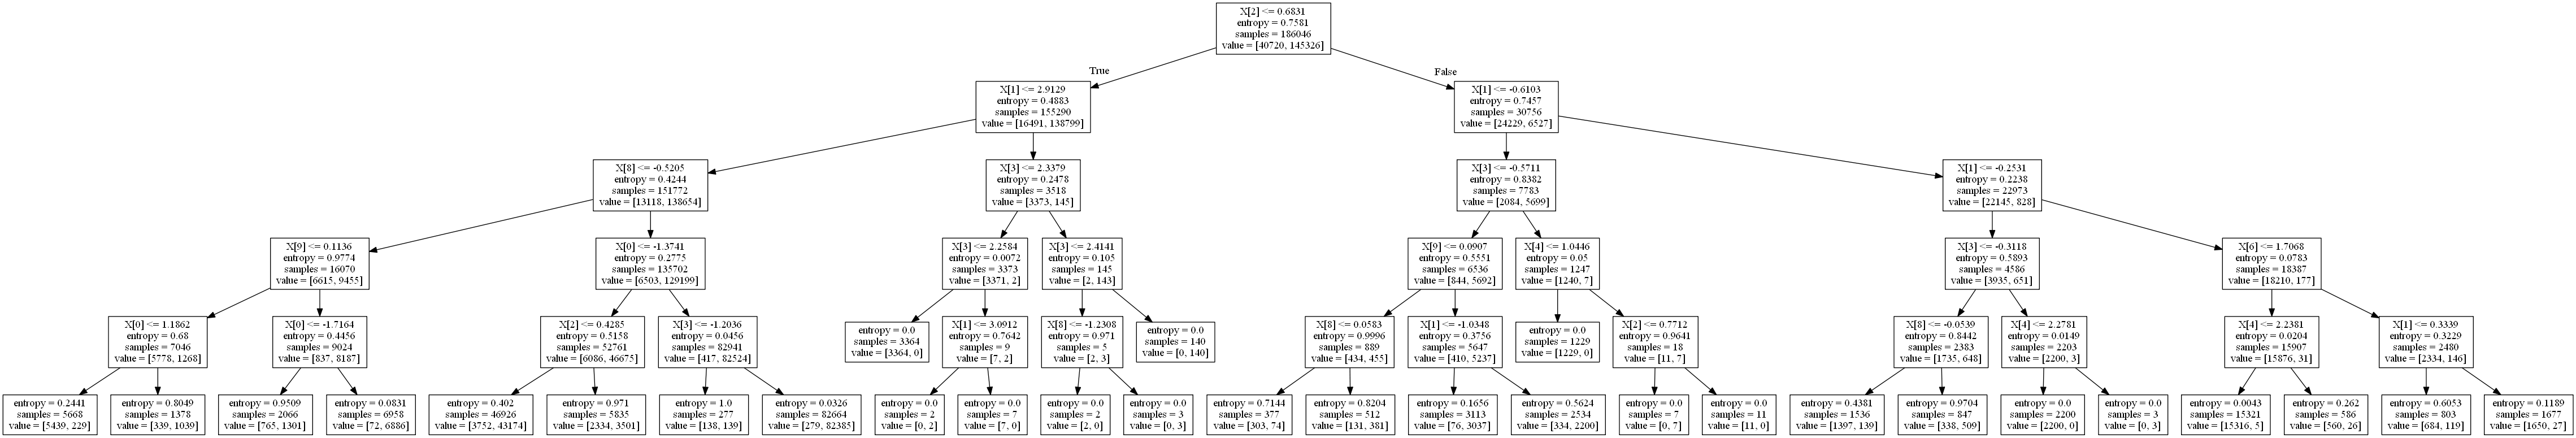

In [124]:
#Decision Tree 시각화
from sklearn.tree import export_graphviz
from IPython.core.display import Image
import pydot
import pydotplus

#export_graphviz(tree,out_file='tree.dot')
pydotplus.find_graphviz()

file = open('tree.dot','r')
text = file.read()

graph = pydotplus.graph_from_dot_data(text)
graph.write_pdf("tree.pdf")
Image(graph.create_png())

### DecisionTree Graph

<img src="./DecisionTree.png"></a>

In [125]:
#Decision Tree
DT_y_pred = tree.predict(X_test_pca) # train data의 성능
print(classification_report(y_test, DT_y_pred, target_names = ['Fraud', 'NotFraud']))

              precision    recall  f1-score   support

       Fraud       0.90      0.87      0.88      4276
    NotFraud       0.97      0.97      0.97     15577

    accuracy                           0.95     19853
   macro avg       0.93      0.92      0.93     19853
weighted avg       0.95      0.95      0.95     19853



### Random Forest

In [126]:
#Random Forest 적용
forest_y_pred = forest.predict(X_test_pca)
print(classification_report(y_test, forest_y_pred, target_names = ['Fraud', 'NotFraud']))

              precision    recall  f1-score   support

       Fraud       0.96      0.91      0.93      4276
    NotFraud       0.98      0.99      0.98     15577

    accuracy                           0.97     19853
   macro avg       0.97      0.95      0.96     19853
weighted avg       0.97      0.97      0.97     19853



### Support Vector Machine

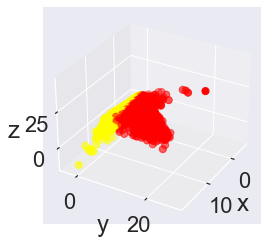

In [128]:
#SVM 시각화
from ipywidgets import interact, fixed
from mpl_toolkits import mplot3d

def plot_3D(elev=30, azim=30, X=X_train_pca[:,0], y=X_train_pca[:,1],):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], X_train_pca[:,2], c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')

interact(plot_3D, elev=[-30, 30], azip=(-180, 180),
         X=fixed(X_train_pca), y=fixed(y_train));

### Support Vector Machine Graph

<img src="./svm3d.png"></a>

In [129]:
#SVM 적용
svm_y_pred = svm.predict(X_test_pca)
print(classification_report(y_test, svm_y_pred, target_names = ['Fraud', 'NotFraud']))

              precision    recall  f1-score   support

       Fraud       0.98      0.97      0.97      4276
    NotFraud       0.99      0.99      0.99     15577

    accuracy                           0.99     19853
   macro avg       0.98      0.98      0.98     19853
weighted avg       0.99      0.99      0.99     19853



### Logistic Regression

In [130]:
#Logistic Regression 적용
lr_y_pred = lr.predict(X_test_pca)
print(classification_report(y_test, lr_y_pred, target_names = ['Fraud', 'NotFraud']))

              precision    recall  f1-score   support

       Fraud       0.99      0.96      0.98      4276
    NotFraud       0.99      1.00      0.99     15577

    accuracy                           0.99     19853
   macro avg       0.99      0.98      0.98     19853
weighted avg       0.99      0.99      0.99     19853



### ROC Curve

In [131]:
from sklearn.metrics import roc_curve

fpr1, tpr1, thresholds1 = roc_curve(y_test, tree.predict(X_test_pca))
fpr2, tpr2, thresholds1 = roc_curve(y_test, forest.predict(X_test_pca))
fpr3, tpr3, thresholds1 = roc_curve(y_test, svm.predict(X_test_pca))
fpr4, tpr4, thresholds1 = roc_curve(y_test, lr.predict(X_test_pca))

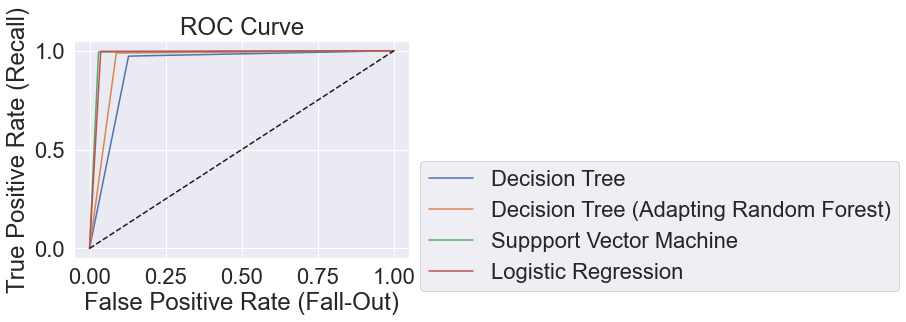

In [147]:
plt.plot(fpr1, tpr1, label="Decision Tree")
plt.plot(fpr2, tpr2, label="Decision Tree (Adapting Random Forest)")
plt.plot(fpr3, tpr3, label="Suppport Vector Machine")
plt.plot(fpr4, tpr4, label="Logistic Regression")

#plt.legend()
plt.legend(loc="lower left")
plt.legend(bbox_to_anchor=(1.0,0.0,0.5,0.5))
plt.plot([0,1], [0,1], 'k--', label="random guess")

plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.show()

## ROC Curve Graph

<img src="./Roc.png"></a>